<a href="https://colab.research.google.com/github/rahiakela/machine-learning-research-and-practice/blob/main/ensemble-methods-for-machine-learning/02-homogeneous-parallel-ensembles/01_bagging_bootstrap_aggregating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Bagging: Bootstrap aggregating

Bagging is the most basic homogeneous parallel ensemble method we can construct.

Bagging uses the same base machine-learning algorithm to train base estimators. 

So how can we get multiple base estimators from a single data set and a single learning
algorithm, let alone diversity? 

This comes by training base estimators on replicates of the
data set. Bagging consists of two steps:

1. During training, bootstrap sampling, or sampling with replacement, is used to generate replicates of the training data set that are different from each other but drawn from the original data set. This ensures that base learners trained on each of the replicates are also different from each other.

2. During prediction, model aggregation is used to combine the predictions of
the individual base learners into one ensemble prediction. For classification
tasks, we can combine individual predictions using majority voting. For regression tasks, we can combine individual predictions using simple averaging.

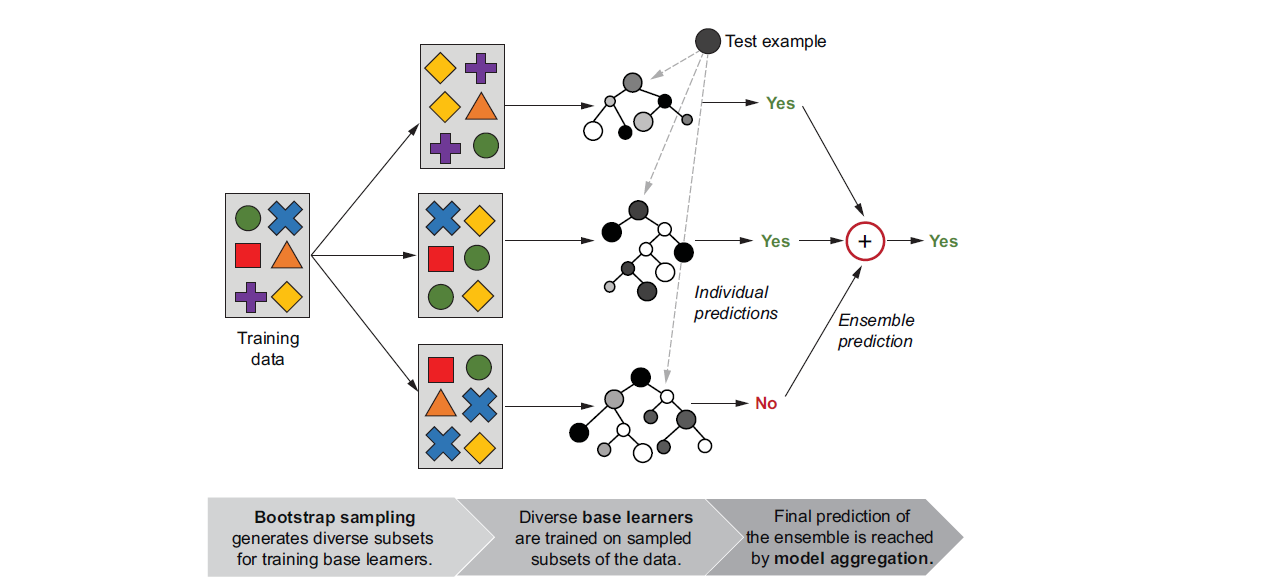

##Setup

In [ ]:
!wget https://github.com/gkunapuli/ensemble-methods-notebooks/raw/master/plot_utils.py

In [2]:
import time
import os
import pickle
import numpy as np

from scipy.stats import mode

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from plot_utils import plot_2d_data, plot_2d_classifier

%matplotlib inline
import matplotlib.pyplot as plt

##Custom Bagging

A custom bagging ensemble is trained independently
using the following steps:

* Generate a bootstrap sample from the original data set.
* Fit a base estimator to the bootstrap sample.

In [3]:
def bagging_fit(X, y, n_estimators, max_depth=5, max_samples=200):
  n_examples = len(y)
  estimators = [DecisionTreeClassifier(max_depth=max_depth) for _ in range(n_estimators)]
  for tree in estimators:
    # Generate a bootstrap sample
    bagging = np.random.choice(n_examples, max_samples, replace=True)
    # Fits a base estimator to the bootstrap sample
    tree.fit(X[bagging, :], y[bagging])
  return estimators

In [4]:
def bagging_predict(X, estimators):
  all_predictions = np.array([tree.predict(X) for tree in estimators])
  # Makes the final predictions by majority voting
  y_pred, _ = mode(all_predictions, axis=0, keepdims=False)
  return np.squeeze(y_pred) 

In [5]:
# let's test our implementation on 2D data and visualize the results
random_state = np.random.RandomState(seed=4190)

X, y = make_moons(n_samples=300, noise=.25, random_state=random_state)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=random_state)

bagging_ensemble = bagging_fit(x_train, y_train, n_estimators=500, max_depth=12, max_samples=300)
y_pred = bagging_predict(x_test, bagging_ensemble)
print(accuracy_score(y_test, y_pred))

0.898989898989899


In [6]:
ensemble_accuracy = accuracy_score(y_test, y_pred)
print(f"Bagging: Holdout accuracy = {ensemble_accuracy * 100:4.2f}")

Bagging: Holdout accuracy = 89.90


In [7]:
single_tree = DecisionTreeClassifier(max_depth=12)
y_pred_single = single_tree.fit(x_train, y_train).predict(x_test)

single_tree_accuracy = accuracy_score(y_test, y_pred_single)
print(f"Single Decision Tree: Holdout test accuracy = {single_tree_accuracy * 100:4.2f}")

Single Decision Tree: Holdout test accuracy = 83.84


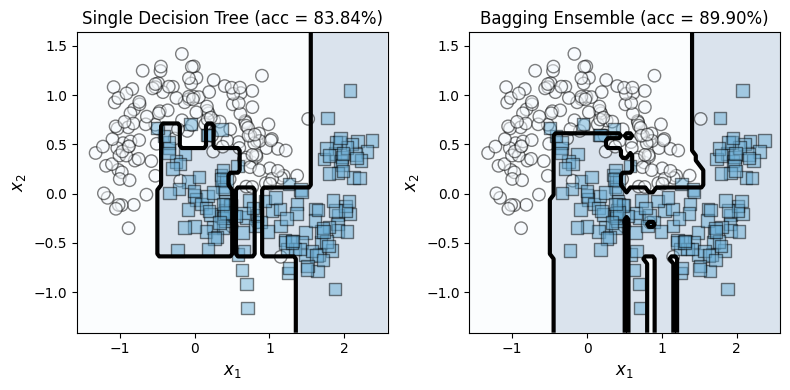

In [8]:
# let's visualize the difference between the bagging classifier and a single decision tree
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

title = 'Single Decision Tree (acc = {0:4.2f}%)'.format(single_tree_accuracy*100)
plot_2d_classifier(ax[0], X, y, colormap='Blues', alpha=0.15, s=80,
                   predict_function=single_tree.predict,
                   xlabel='$x_1$', ylabel='$x_2$', title=title)

title = 'Bagging Ensemble (acc = {0:4.2f}%)'.format(ensemble_accuracy*100)
plot_2d_classifier(ax[1], X, y, colormap='Blues', alpha=0.15, s=80,
                   predict_function=bagging_predict, predict_args=(bagging_ensemble),
                   xlabel='$x_1$', ylabel='$x_2$', title=title)

fig.tight_layout()

##Bagging